# Przygotowanie bibliotek i wczytanie danych

In [1]:
import numpy as np
import pandas as pd

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
defaults = pd.read_csv("defaults.csv", sep = ";")
defaults.drop('ID', axis='columns', inplace=True)
# defaults.head()

# Analiza zbioru danych

In [3]:
round(defaults["default payment next month"].value_counts() / len(defaults), 3)

0    0.778
1    0.222
Name: default payment next month, dtype: float64

Przeanalizuj załadowany zbiór danych. Czy klasy decyzyjne są “zbalansowane”?

Dane nie są zbalansowane. Zmienna klasyfikacyjna ma wartość 0 w ok. 78% przypadków, a wartość 1 w ok. 22% przypadków.

In [4]:
pd.set_option('display.max_rows', 100)

def_corr = defaults.corr()['default payment next month']
print(def_corr)

LIMIT_BAL                    -0.152069
SEX                          -0.038910
EDUCATION                     0.028307
MARRIAGE                     -0.024699
AGE                           0.012804
PAY_0                         0.325488
PAY_2                         0.262358
PAY_3                         0.232686
PAY_4                         0.212571
PAY_5                         0.202783
PAY_6                         0.184743
BILL_AMT1                    -0.020690
BILL_AMT2                    -0.014707
BILL_AMT3                    -0.014931
BILL_AMT4                    -0.009766
BILL_AMT5                    -0.007018
BILL_AMT6                    -0.005246
PAY_AMT1                     -0.076654
PAY_AMT2                     -0.063145
PAY_AMT3                     -0.057249
PAY_AMT4                     -0.057171
PAY_AMT5                     -0.053631
PAY_AMT6                     -0.055104
default payment next month    1.000000
Name: default payment next month, dtype: float64


Przeanalizuj wpływ poszczególnych atrybutów danych na wpływ klasyfikacji.
W powyższym zestawieniu przedstawiony jest poziom skorelowania atrybutów ze zmienną 'default payment next month' 

Czy wykorzystanie wszystkich z nich może wpłynąć na poprawność klasyfikacji?
To pytanie pozostawiam na kolejne etapy analizy.

# Zamiana danych kategorycznych na zmienne binarne

In [5]:
for col in ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    defaults[col] = defaults[col].astype('category')
# defaults.info()

In [6]:
defaults = pd.get_dummies(data=defaults, drop_first=True)
# defaults.info()

In [7]:
# defaults.head()

# Standaryzacja zmiennych niebinarnych

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
defaults[['LIMIT_BAL', 'AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'
        ,'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']] = scaler.fit_transform(defaults[['LIMIT_BAL', 'AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'
        ,'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']])
# defaults.head()
# defaults.info()

# Zdecydowałem się wziąć wszystkie kolumny do modelu

In [9]:
a = defaults.columns[0:-1].tolist()
X = defaults[a]
y = defaults["default payment next month"].copy()
# print(X, y)

# Regresja logistyczna

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
mdl = LogisticRegression(C = 1)
resLG = mdl.fit(X_train, y_train)
predictions = mdl.predict(X_test)
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions))

[[6531    0]
 [   0 1869]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6531
           1       1.00      1.00      1.00      1869

    accuracy                           1.00      8400
   macro avg       1.00      1.00      1.00      8400
weighted avg       1.00      1.00      1.00      8400



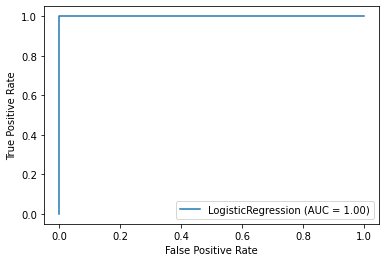

In [11]:
metrics.plot_roc_curve(mdl, X_test, y_test)

Regresja logistyczna pozwala w 100% przyporządkować elementy do poszczególnych klas
w zbiorze testowym.

# SVM  (kernel = 'linear')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
mdl = svm.SVC(C = 1, kernel = 'linear')
resSVM = mdl.fit(X_train, y_train)
predictions = resSVM.predict(X_test)
print(metrics.confusion_matrix(predictions, y_test))
print(metrics.classification_report(y_test, predictions))

[[6522    0]
 [   0 1878]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6522
           1       1.00      1.00      1.00      1878

    accuracy                           1.00      8400
   macro avg       1.00      1.00      1.00      8400
weighted avg       1.00      1.00      1.00      8400



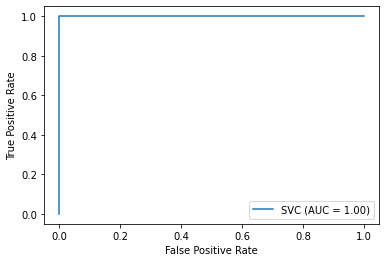

In [13]:
metrics.plot_roc_curve(mdl, X_test, y_test)

SVM z jądem liniowym pozwala w 100% na przyporządkowanie elementów do poszczególnych klas
w zbiorze testowym.

# SVM (kernel = 'rbf')

C=1

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
mdl = svm.SVC(C = 1, kernel = 'rbf')
resSVM = mdl.fit(X_train, y_train)
predictions = resSVM.predict(X_test)
print(metrics.confusion_matrix(predictions, y_test))
print(metrics.classification_report(y_test, predictions))

[[6546   28]
 [   0 1826]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6546
           1       1.00      0.98      0.99      1854

    accuracy                           1.00      8400
   macro avg       1.00      0.99      1.00      8400
weighted avg       1.00      1.00      1.00      8400



SVM z jądem rbf (C=1) pozwala w niemal 100% na przyporządkowanie elementów do poszczególnych klas
w zbiorze testowym.

Zakomentowałem pozostałe warianty SVM kernel='rbf' ponieważ kod wykonuje się od kilku do kilkunastu minut

C=100

In [15]:
# mdl = svm.SVC(C = 100, kernel = 'rbf')
# resSVM = mdl.fit(X_train, y_train)
# predictions = resSVM.predict(X_test)
# print(metrics.confusion_matrix(predictions, y_test))
# print(metrics.classification_report(y_test, predictions))

C=1, gamma=1

In [16]:
# mdl = svm.SVC(C = 1, kernel = 'rbf', gamma = 1)
# resSVM = mdl.fit(X_train, y_train)
# predictions = resSVM.predict(X_test)
# print(metrics.confusion_matrix(predictions, y_test))
# print(metrics.classification_report(y_test, predictions))

C = 100, gamma = 500

In [17]:
# mdl = svm.SVC(C = 100, kernel = 'rbf', gamma = 500)
# resSVM = mdl.fit(X, y)
# predictions = resSVM.predict(X)
# print(metrics.confusion_matrix(y, predictions))
# print(metrics.classification_report(y, predictions))

C = 1, gamma = 0.1

In [18]:
# mdl = svm.SVC(C = 1, kernel = 'rbf', gamma = 0.1)
# resSVM = mdl.fit(X, y)
# predictions = resSVM.predict(X)
# print(metrics.confusion_matrix(y, predictions))
# print(metrics.classification_report(y, predictions))

SVM z jądem rbf dla różnych wartości parametrów C i gamma pozwala w niemal 100% na przyporządkowanie elementów do poszczególnych klas w zbiorze testowym.

# Walidacja krzyżowa - SVM z jądrem liniowym

In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

mdl = svm.SVC(C = 1, kernel = 'linear')
cv = KFold(n_splits=10, shuffle=True)
scores = cross_val_score(mdl, X, y, scoring='accuracy', cv=cv)
print('Accuracy: %.3f' % (np.mean(scores)))

Accuracy: 1.000


In [20]:
from sklearn.model_selection import RepeatedKFold
mdl = svm.SVC(C = 1, kernel = 'linear')
cv = RepeatedKFold(n_splits=7, n_repeats=10)
scores = cross_val_score(mdl, X, y, scoring='accuracy', cv=cv)
print('Accuracy: %.3f' % (np.mean(scores)))

Accuracy: 1.000


Walidacja krzyżowa dla SVM z jądrem liniowym potwierdza, że model przyporządkowuje dane do klas
ze 100% skutecznością.

# Walidacja na zbiorze defaults_valid.csv

In [21]:
validation = pd.read_csv("defaults_valid.csv", sep = ";")
validation.drop('ID', axis='columns', inplace=True)

In [22]:
for col in ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    validation[col] = validation[col].astype('category')

In [23]:
validation = pd.get_dummies(data=validation, drop_first=True)
# validation.info()

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
validation[['LIMIT_BAL', 'AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'
        ,'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']] = scaler.fit_transform(validation[['LIMIT_BAL', 'AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'
        ,'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']])
# validation.info()

Do modelu biorę tylko te kolumny, które istnieją w zbiorze walidacyjnym
(zmienne kategoryczne w zbiorze walidacyjnym mają mniej poziomów)

In [25]:
a = validation.columns[0:-1].tolist()

X = defaults[a]
y = defaults["default payment next month"].copy()

X_validation = validation[a]
y_validation = validation["default payment next month"].copy()
# print(X_validation, y_validation)

Walidacja - regresja logistyczna

In [26]:
mdl = LogisticRegression(C = 1, max_iter = 1000)
resLG = mdl.fit(X, y)
predictions = mdl.predict(X_validation)
print(metrics.confusion_matrix(y_validation, predictions))
print(metrics.classification_report(y_validation, predictions))

[[1575    0]
 [   0  426]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1575
           1       1.00      1.00      1.00       426

    accuracy                           1.00      2001
   macro avg       1.00      1.00      1.00      2001
weighted avg       1.00      1.00      1.00      2001



Model regresji logistycznej pozwala na w 100% poprawną klasyfikację zbioru walidacyjnego.

Walidacja - SVM (kernel = 'linear')

In [27]:
mdl = svm.SVC(C = 1, kernel = 'linear')
resSVM = mdl.fit(X, y)
predictions = resSVM.predict(X_validation)
print(metrics.confusion_matrix(y_validation, predictions))
print(metrics.classification_report(y_validation, predictions))

[[1575    0]
 [   0  426]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1575
           1       1.00      1.00      1.00       426

    accuracy                           1.00      2001
   macro avg       1.00      1.00      1.00      2001
weighted avg       1.00      1.00      1.00      2001



Model SVM z jądrem liniowym pozwala na w 100% poprawną klasyfikację zbioru walidacyjnego.

In [28]:
mdl = svm.SVC(C = 1, kernel = 'rbf')
resSVM = mdl.fit(X, y)
predictions = resSVM.predict(X_validation)
print(metrics.confusion_matrix(y_validation, predictions))
print(metrics.classification_report(y_validation, predictions))

[[1575    0]
 [   7  419]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1575
           1       1.00      0.98      0.99       426

    accuracy                           1.00      2001
   macro avg       1.00      0.99      0.99      2001
weighted avg       1.00      1.00      1.00      2001



Model SVM z jądrem liniowym pozwala na niemal w 100% poprawną klasyfikację zbioru walidacyjnego.